In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))
import cone_prog_refine as cpr 
import time

import cvxpy as cvx
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
m,n = 200,500
A = np.random.randn(m,n)
x = np.random.randn(n)
y = np.random.randn(n)

In [3]:
def test_mat(A):
    print('m,n = ', (m,n))
    error = A@x + A@y - A@(x+y)
    print('norm error', np.linalg.norm(error))
    print('max abs error', np.max(np.abs(error)))
    u,s,v = np.linalg.svd(A, full_matrices=False)
    assert np.allclose(u @ np.diag(s) @ v, A)
    print('cond number %g' % (s[0]/s[-1]))
    #plt.plot(error)

In [4]:
test_mat(A)

m,n =  (200, 500)
norm error 1.778415110647672e-13
max abs error 3.907985046680551e-14
cond number 4.37165


In [5]:
u,s,v = np.linalg.svd(A, full_matrices=False)
assert np.allclose(u @ np.diag(s) @ v, A)

In [6]:
s[0] *= 1000

In [7]:
test_mat(u @ np.diag(s) @ v)

m,n =  (200, 500)
norm error 2.4064684462945157e-11
max abs error 9.094947017729282e-12
cond number 4371.65


In [8]:
s[0] *= 1000

In [9]:
test_mat(u @ np.diag(s) @ v)

m,n =  (200, 500)
norm error 2.404528305367108e-08
max abs error 7.450580596923828e-09
cond number 4.37165e+06


In [10]:
s[-1] = 1E-14

In [11]:
test_mat(u @ np.diag(s) @ v)

m,n =  (200, 500)
norm error 2.3815922049635305e-08
max abs error 7.450580596923828e-09
cond number 2.35825e+16


In [12]:
s[1] *= 1000

In [13]:
test_mat(u @ np.diag(s) @ v)

m,n =  (200, 500)
norm error 2.2704831212022484e-08
max abs error 7.450580596923828e-09
cond number 2.36574e+16


In [14]:
s[1] *= 1E6

In [15]:
test_mat(u @ np.diag(s) @ v)

m,n =  (200, 500)
norm error 2.9177021590862225e-05
max abs error 1.049041748046875e-05
cond number 2.25184e+15


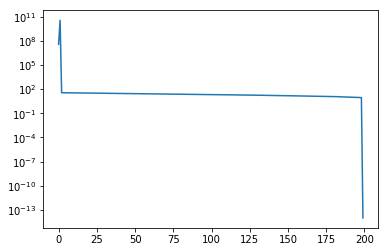

In [16]:
plt.semilogy(s)

## Can we help? 

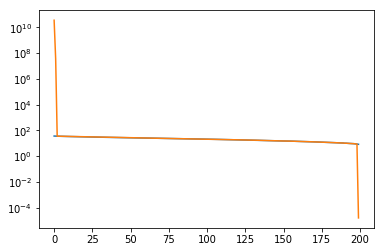

In [17]:
bad_A = u @ np.diag(s) @ v
plt.semilogy(np.linalg.svd(A)[1])
plt.semilogy(np.linalg.svd(bad_A)[1])

In [47]:
u,s,v = np.linalg.svd(bad_A, full_matrices=False)

In [48]:
low_rank_A = u[:,:2] @ np.diag(s[:2]) @ v[:2]
#kernel_A = u[:,-1:] @ np.diag(s[-1:]) @ v[-1:]
#residual = bad_A - low_rank_A
residual = u[:,2:] @ np.diag(s[2:]) @ v[2:]
#residual -= kernel_A

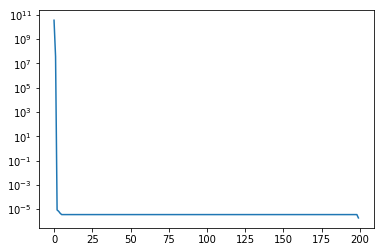

In [49]:
plt.semilogy(np.linalg.svd(low_rank_A)[1])

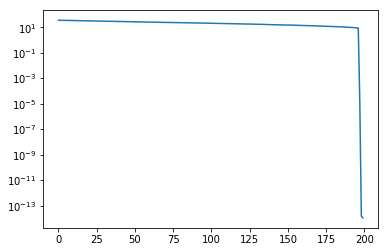

In [51]:
plt.semilogy(np.linalg.svd(residual)[1])

In [52]:
test_mat(bad_A)

m,n =  (200, 500)
norm error 2.9177021590862225e-05
max abs error 1.049041748046875e-05
cond number 2.25184e+15


In [53]:
def A_dot(x):
    return low_rank_A @ x + residual @ x

In [54]:
error = A_dot(x) + A_dot(y) - A_dot(x + y)
np.linalg.norm(error), np.max(np.abs(error))

(2.563885705692819e-05, 5.7220458984375e-06)

In [56]:
error = (low_rank_A @ x) + low_rank_A @ y  - low_rank_A @ (x + y)
np.linalg.norm(error), np.max(np.abs(error))

(2.5938716642575504e-05, 5.7220458984375e-06)

In [ ]:
import cvxpy as cvx

n = 1000
x = cvx.Variable(n)

A =